# Logistic Regression
## Day 2 - ML Workshop
---

In [26]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def sig(x):
    return 1/(1 + np.exp(-x))

In [28]:
x = np.arange(-10,10,0.1)

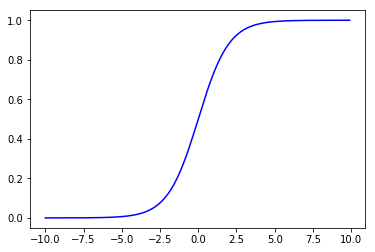

In [29]:
plt.plot(
    x, sig(x), 'b'
)

In [76]:
def h(a, x, b):
    return sig((a*x) + b)

In [77]:
# cost(h(x), y) = -y*log(h(x)) - (1-y)*log(1-h(x))
def cost(h, y):
    return -(y * np.log(h)) - (1-y) * (np.log(1 - h))

In [91]:
def error(a, x, b, y):
    e = 0
    m = len(y)
    for i in range(m):
        e += cost(h(a, x[i], b), y[i])
    return e/m

In [92]:
def stepGradient(a, x, b, y, lr):
    gradA, gradB = 0, 0
    m = len(y)
    for i in range(m):
        gradA += (1/m) * (h(a, x[i], b) - y[i]) * x[i]
        gradB += (1/m) * (h(a, x[i], b) - y[i])
        
    a -= gradA * learningRate
    b -= gradB * learningRate
    
    return a, b

In [93]:
def descend(initA, x, initB, t, learningRate, steps):
    a, b = initA, initB
    for i in range(steps):
        a, b = stepGradient(a, x, b, t, learningRate)
        if i%1000 == 0:
            print(f"Error: {error(a, x, b, t)}, a: {a}, b: {b}")
    return a, b

In [94]:
dataset = load_breast_cancer()

In [95]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

In [96]:
features = pd.DataFrame(dataset.data, columns=dataset.feature_names)
target = pd.DataFrame(dataset.target, columns=['TAR'])

In [97]:
df = pd.concat( [features, target], axis = 1 )
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TAR
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [98]:
corelation = df.corr('pearson')
corelation['TAR'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

In [99]:
# X = No. of rooms
X = df['worst concave points']

# Y = Target
Y = df['TAR']

In [100]:
# normalize data
X = (X - X.min()) / (X.max() - X.min())
Y = (Y - Y.min()) / (Y.max() - Y.min())

# dataframes to np arrays
X = X.values
Y = Y.values

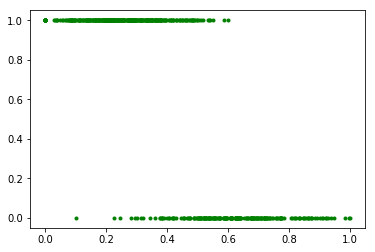

In [101]:
plt.plot(X, Y, 'g.')

In [139]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [140]:
'xtrain: ', len(xtrain), 'xtest: ', len(xtest), 'ytrain: ', len(ytrain), 'ytest: ', len(ytest)

('xtrain: ', 455, 'xtest: ', 114, 'ytrain: ', 455, 'ytest: ', 114)

In [154]:
initA, initB = 0, 0
learningRate = 0.3
steps = 10000

In [155]:
finalA, finalB = descend(initA, xtrain, initB, ytrain, learningRate, steps)

Error: 0.6871500445264824, a: -0.010026463124504358, b: 0.04186813186813181
Error: 0.2643812599634797, a: -8.792043847183354, b: 4.19259814863506
Error: 0.23008487861639754, a: -11.683479778428737, b: 5.4474650049402635
Error: 0.21851671071371354, a: -13.378824795463139, b: 6.184877119337852
Error: 0.2131616812309061, a: -14.535428473626467, b: 6.688795159900903
Error: 0.21029147200853482, a: -15.383141329118361, b: 7.058602511247664
Error: 0.2086169912565269, a: -16.03099407363074, b: 7.3415013688334385
Error: 0.20758490966779797, a: -16.539774101879622, b: 7.563844077967144
Error: 0.20692399733729766, a: -16.946992792304776, b: 7.741914208370303
Error: 0.20648881500202038, a: -17.277472110399675, b: 7.886500376014016


In [156]:
learningRate = 0.001
steps = 5000

In [157]:
finalA, finalB = descend(finalA, xtrain, finalB, ytrain, learningRate, steps)

Error: 0.20619642369569188, a: -17.54824859412961, b: 8.005015135707255
Error: 0.20619562431732558, a: -17.549067631679062, b: 8.005373682894115
Error: 0.2061948259503798, a: -17.549886150770938, b: 8.005732003515934
Error: 0.20619402859344976, a: -17.550704151797483, b: 8.006090097743954
Error: 0.20619323224513322, a: -17.55152163515063, b: 8.006447965749329


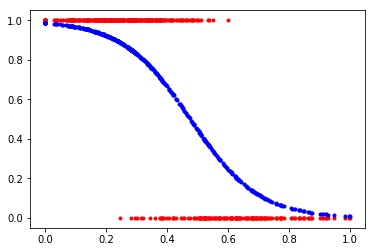

In [145]:
plt.plot(
    xtrain, ytrain, 'r.',
    xtrain, h(finalA, xtrain, finalB), 'b.'
)

In [146]:
def predict(a, x, b, y):
    p = h(a, x, b)
    correct = 0
    
    for i in range(len(y)):
        pr = 0
        if p[i] > 0.5:
            pr = 1
        if pr == y[i]:
            correct += 1
    print(f"Accuracy: {correct/len(y)}")

In [158]:
predict(finalA, xtrain, finalB, ytrain)

Accuracy: 0.9120879120879121


In [159]:
predict(finalA, xtest, finalB, ytest)

Accuracy: 0.8947368421052632
